#### **코스피 등락에 대한 feature importance**

#### **더미변수 생성하여 코스피 등락에 가장 영향을 많이 미치는 feature 추출하기**
-> 동민오빠코드(y값x값나눠주고중요피쳐값들뽑아서시각화.ipynb) 참고

>1. 최종데이터셋 날짜를 통해 요일 칼럼 추가 
>2. 1에 동행지수와 동행지수label 추가
>3. 등락률 0/1로 레이블로 추가
>4. 최종데이터셋 에서 년도/ 월 / 요일 dummy변수로 추가 생성

In [1]:
import pandas as pd
import time , datetime
import numpy as np

In [2]:
finish=pd.read_csv('./dataset/최종데이터셋_주체모두_코스피종가_등락률까지.csv')
finish.drop(index=[207],axis=0,inplace=True)
finish

,Unnamed: 0,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수
0,0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984
1,1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928
2,2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920
3,3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955
4,4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254
...,...,...,...,...,...,...,...,...,...,...
202,202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380
203,203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846
204,204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687
205,205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629


In [3]:
finish['날짜']

0      2005-01-31
1      2005-02-28
2      2005-03-31
3      2005-04-29
4      2005-05-31
          ...    
202    2021-11-30
203    2021-12-30
204    2022-01-28
205    2022-02-28
206    2022-03-31
Name: 날짜, Length: 207, dtype: object

In [4]:
abc=pd.read_csv('시가총액대비&날짜.csv')
abc

,Unnamed: 0,날짜,시가총액대비
0,0,2005-01-01,42.9
1,1,2005-02-01,42.7
2,2,2005-03-01,42.2
3,3,2005-04-01,41.9
4,4,2005-05-01,41.7
...,...,...,...
202,202,2021-11-01,33.0
203,203,2021-12-01,33.5
204,204,2022-01-01,32.7
205,205,2022-02-01,32.4


In [5]:
abc['날짜']=finish['날짜']


In [6]:
cycle_label = pd.read_csv("./dataset/동행지수레이블.csv")
cycle_label

,Unnamed: 0,date,동행지수,선행지수,label
0,36,2005-01-01,99.0,98.8,0
1,37,2005-02-01,98.7,99.1,0
2,38,2005-03-01,98.8,99.6,0
3,39,2005-04-01,98.6,99.6,0
4,40,2005-05-01,98.7,99.3,0
...,...,...,...,...,...
201,237,2021-10-01,100.9,100.7,1
202,238,2021-11-01,101.1,100.4,1
203,239,2021-12-01,101.8,100.2,1
204,240,2022-01-01,102.4,100.1,1


In [7]:
#마지막 3월 추가 해주기
cycle_label.loc[206]  = [242 , '2022-03-01' , 102.4 , 99.5 , 1]
cycle_label['date']=pd.to_datetime(cycle_label['date'])
cycle_label_df=cycle_label[['label','date']]
cycle_label_df


,label,date
0,0,2005-01-01
1,0,2005-02-01
2,0,2005-03-01
3,0,2005-04-01
4,0,2005-05-01
...,...,...
202,1,2021-11-01
203,1,2021-12-01
204,1,2022-01-01
205,1,2022-02-01


In [8]:
a=pd.merge(finish,abc,how='left',on='날짜')
a.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1,inplace=True)
a['date']=pd.to_datetime(a['date'])

In [9]:
b=pd.merge(a,cycle_label_df,how='left',on='date')
b

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,시가총액대비,label
0,2005-01-31,2005-01-01,2005,1,932.700012,0.041053,8538,-9523,984,42.9,0
1,2005-02-28,2005-02-01,2005,2,1011.359985,0.084336,14654,-5725,-8928,42.7,0
2,2005-03-31,2005-03-01,2005,3,965.679993,-0.045167,-20741,3820,16920,42.2,0
3,2005-04-29,2005-04-01,2005,4,911.299988,-0.056313,-3243,2291,955,41.9,0
4,2005-05-31,2005-05-01,2005,5,970.210022,0.064644,1048,-18304,17254,41.7,0
...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021-11-01,2021,11,2839.010010,-0.044323,11342,16641,-27380,33.0,1
203,2021-12-30,2021-12-01,2021,12,2977.649902,0.048834,15250,-30452,15846,33.5,1
204,2022-01-28,2022-01-01,2022,1,2663.340088,-0.105556,-389,12674,6687,32.7,1
205,2022-02-28,2022-02-01,2022,2,2699.179932,0.013457,-6207,-10135,-3629,32.4,1


In [10]:
b['등락률label']=np.arange(207)
for i in range(207):
    if b['전월대비 등락률'][i]>=0:
        b['등락률label'][i]=1
    else:
        b['등락률label'][i]=0

C:\Users\jangd\AppData\Local\Temp\ipykernel_7916\4167564065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['등락률label'][i]=1
C:\Users\jangd\AppData\Local\Temp\ipykernel_7916\4167564065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['등락률label'][i]=0


In [11]:
b

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,시가총액대비,label,등락률label
0,2005-01-31,2005-01-01,2005,1,932.700012,0.041053,8538,-9523,984,42.9,0,1
1,2005-02-28,2005-02-01,2005,2,1011.359985,0.084336,14654,-5725,-8928,42.7,0,1
2,2005-03-31,2005-03-01,2005,3,965.679993,-0.045167,-20741,3820,16920,42.2,0,0
3,2005-04-29,2005-04-01,2005,4,911.299988,-0.056313,-3243,2291,955,41.9,0,0
4,2005-05-31,2005-05-01,2005,5,970.210022,0.064644,1048,-18304,17254,41.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021-11-01,2021,11,2839.010010,-0.044323,11342,16641,-27380,33.0,1,0
203,2021-12-30,2021-12-01,2021,12,2977.649902,0.048834,15250,-30452,15846,33.5,1,1
204,2022-01-28,2022-01-01,2022,1,2663.340088,-0.105556,-389,12674,6687,32.7,1,0
205,2022-02-28,2022-02-01,2022,2,2699.179932,0.013457,-6207,-10135,-3629,32.4,1,1


In [12]:
finish_dummy=pd.get_dummies(b, columns = ['년도' ,'월'])
finish_dummy
#data_dummy.drop(['날짜','Unnamed: 0'], axis = 1 , inplace = True)
finish_dummy.to_csv('최종피쳐&년도월더미_2.csv')
finish_dummy

,날짜,date,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,시가총액대비,label,등락률label,...,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
0,2005-01-31,2005-01-01,932.700012,0.041053,8538,-9523,984,42.9,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2005-02-28,2005-02-01,1011.359985,0.084336,14654,-5725,-8928,42.7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2005-03-31,2005-03-01,965.679993,-0.045167,-20741,3820,16920,42.2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2005-04-29,2005-04-01,911.299988,-0.056313,-3243,2291,955,41.9,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2005-05-31,2005-05-01,970.210022,0.064644,1048,-18304,17254,41.7,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021-11-01,2839.010010,-0.044323,11342,16641,-27380,33.0,1,0,...,0,0,0,0,0,0,0,0,1,0
203,2021-12-30,2021-12-01,2977.649902,0.048834,15250,-30452,15846,33.5,1,1,...,0,0,0,0,0,0,0,0,0,1
204,2022-01-28,2022-01-01,2663.340088,-0.105556,-389,12674,6687,32.7,1,0,...,0,0,0,0,0,0,0,0,0,0
205,2022-02-28,2022-02-01,2699.179932,0.013457,-6207,-10135,-3629,32.4,1,1,...,0,0,0,0,0,0,0,0,0,0


---

In [13]:
import plotly.express as px
import plotly.io as pio
import os #꼭 넣기
pio.renderers.default = "notebook_connected"
import numpy as np
import plotly.graph_objects as go

In [14]:
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### **feature importance**

##### 최종을 보면 더미변수를 넣은 피쳐값 그리고 외국인 순매수 그리고 등락률 관계를 알 수 있음

##### 컬럼 X의 피쳐명 변수에 넣어주기

In [15]:
# finish_dummy.drop(['날짜','date'],axis=1,inplace=True)
finish_dummy

,날짜,date,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,시가총액대비,label,등락률label,...,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
0,2005-01-31,2005-01-01,932.700012,0.041053,8538,-9523,984,42.9,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2005-02-28,2005-02-01,1011.359985,0.084336,14654,-5725,-8928,42.7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2005-03-31,2005-03-01,965.679993,-0.045167,-20741,3820,16920,42.2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2005-04-29,2005-04-01,911.299988,-0.056313,-3243,2291,955,41.9,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2005-05-31,2005-05-01,970.210022,0.064644,1048,-18304,17254,41.7,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021-11-01,2839.010010,-0.044323,11342,16641,-27380,33.0,1,0,...,0,0,0,0,0,0,0,0,1,0
203,2021-12-30,2021-12-01,2977.649902,0.048834,15250,-30452,15846,33.5,1,1,...,0,0,0,0,0,0,0,0,0,1
204,2022-01-28,2022-01-01,2663.340088,-0.105556,-389,12674,6687,32.7,1,0,...,0,0,0,0,0,0,0,0,0,0
205,2022-02-28,2022-02-01,2699.179932,0.013457,-6207,-10135,-3629,32.4,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
finish_dummy['label'] = finish_dummy['label'].astype('category')
finish_dummy['등락률label'] = finish_dummy['등락률label'].astype('category')
finish_dummy.dtypes

날짜                  object
date        datetime64[ns]
종가                 float64
전월대비 등락률           float64
외국인순매수               int64
개인순매수                int64
기관순매수                int64
시가총액대비             float64
label             category
등락률label          category
년도_2005              uint8
년도_2006              uint8
년도_2007              uint8
년도_2008              uint8
년도_2009              uint8
년도_2010              uint8
년도_2011              uint8
년도_2012              uint8
년도_2013              uint8
년도_2014              uint8
년도_2015              uint8
년도_2016              uint8
년도_2017              uint8
년도_2018              uint8
년도_2019              uint8
년도_2020              uint8
년도_2021              uint8
년도_2022              uint8
월_1                  uint8
월_2                  uint8
월_3                  uint8
월_4                  uint8
월_5                  uint8
월_6                  uint8
월_7                  uint8
월_8                  uint8
월_9                  uint8
월

In [17]:
finish_dummy.dtypes
finish_dummy.to_csv('최종최종피쳐.csv')
finish_dummy

,날짜,date,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,시가총액대비,label,등락률label,...,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
0,2005-01-31,2005-01-01,932.700012,0.041053,8538,-9523,984,42.9,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2005-02-28,2005-02-01,1011.359985,0.084336,14654,-5725,-8928,42.7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2005-03-31,2005-03-01,965.679993,-0.045167,-20741,3820,16920,42.2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2005-04-29,2005-04-01,911.299988,-0.056313,-3243,2291,955,41.9,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2005-05-31,2005-05-01,970.210022,0.064644,1048,-18304,17254,41.7,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021-11-01,2839.010010,-0.044323,11342,16641,-27380,33.0,1,0,...,0,0,0,0,0,0,0,0,1,0
203,2021-12-30,2021-12-01,2977.649902,0.048834,15250,-30452,15846,33.5,1,1,...,0,0,0,0,0,0,0,0,0,1
204,2022-01-28,2022-01-01,2663.340088,-0.105556,-389,12674,6687,32.7,1,0,...,0,0,0,0,0,0,0,0,0,0
205,2022-02-28,2022-02-01,2699.179932,0.013457,-6207,-10135,-3629,32.4,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
finish_dummy.drop(['날짜','date'],axis=1,inplace=True)

In [19]:
finish_dummy.columns

Index(['종가', '전월대비 등락률', '외국인순매수', '개인순매수', '기관순매수', '시가총액대비', 'label',
       '등락률label', '년도_2005', '년도_2006', '년도_2007', '년도_2008', '년도_2009',
       '년도_2010', '년도_2011', '년도_2012', '년도_2013', '년도_2014', '년도_2015',
       '년도_2016', '년도_2017', '년도_2018', '년도_2019', '년도_2020', '년도_2021',
       '년도_2022', '월_1', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8',
       '월_9', '월_10', '월_11', '월_12'],
      dtype='object')

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

##### 훈련시키기 위해 피쳐값과 레이블값 나누기

In [21]:
y_data = finish_dummy['등락률label']
X_data=finish_dummy.drop(['종가','전월대비 등락률','등락률label'], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=156)

##### 랜덤포레스트로 훈련시켜주기

In [23]:
for_ran=RandomForestClassifier(n_estimators=300,max_depth=20,min_samples_leaf=10,min_samples_split=10,random_state=156)
for_ran.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, random_state=156)

##### feature imfortance 중요한 컬럼값들 뽑아서 시각화

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [25]:
for_importances_vals=for_ran.feature_importances_
for_importances= pd.Series(for_importances_vals,index=X_train.columns)
bst_top6=for_importances.sort_values(ascending=False)[:12]
bst_top6_featurenames=bst_top6.index
bst_top6_featurenames

Index(['외국인순매수', '기관순매수', '개인순매수', '시가총액대비', 'label', '월_3', '월_2', '월_11',
       '월_1', '월_12', '월_10', '월_9'],
      dtype='object')

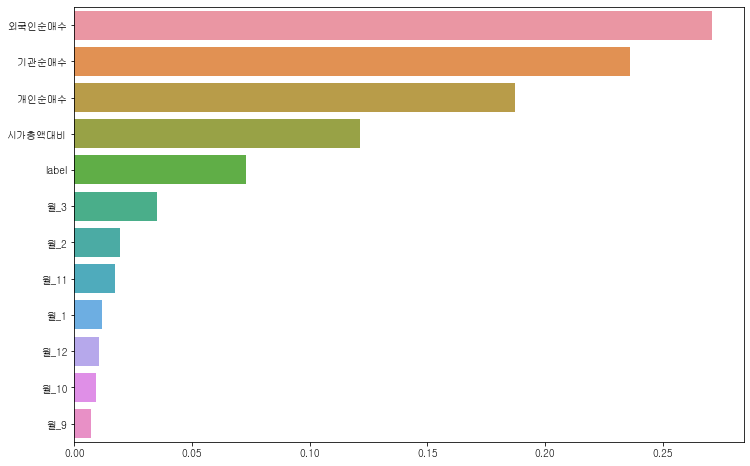

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x=bst_top6,y=bst_top6.index)
plt.show()

1. 다중회귀분석

1-1 다중공선성 측정

In [27]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = finish_dummy['등락률label']
feature1 = finish_dummy['외국인순매수']
feature2 = finish_dummy['개인순매수']
feature3 = finish_dummy['기관순매수'] 
feature4 = finish_dummy['시가총액대비']
feature5 = finish_dummy['label'] 
 
feature = pd.concat([feature1, feature2,feature3,feature4,feature5], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [28]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)

,VIF Factor,features
0,6.498471,외국인순매수
1,5.341342,기관순매수
2,3.026143,label
3,3.001086,시가총액대비
4,2.678243,개인순매수


In [29]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

feature_drop = vif_drop(feature, 10)

1번째 VIF 측정
Max VIF feature & value : 외국인순매수,  6.4985




In [32]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = feature_drop

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')


model = sm.OLS(target, feature_add)


fitted_model = model.fit()

# # summary 함수통해 결과출력
fitted_model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity